In [67]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def imagen(img):
    img=cv.imread('G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/'+img,
                  cv.IMREAD_GRAYSCALE)
    if img is None:
        img=cv.imread('C:/Users/claudio.pacheco/Documents/Repositorio/'+img,cv.IMREAD_GRAYSCALE)
    #Cortar la imagen a 256x256 de la esquina superior izquierda
    img = img[0:256, 0:256]
    plt.imshow(img,cmap='gray')
    return img

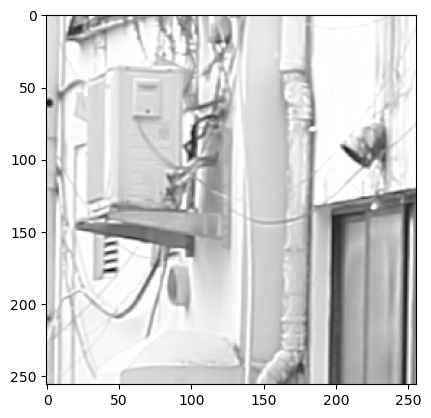

In [69]:
img=imagen('DPP0357.TIF')

In [70]:
def avg_filter(imagen, n):
    # Obtener las dimensiones de la imagen
    rows, cols = imagen.shape
    
    # Crear una imagen de salida del mismo tamaño que la original
    output = np.zeros((rows, cols), dtype=imagen.dtype)

    # Dimensiones del kernel
    kernel_size = 2 * n + 1

    # Recorrer la imagen con un desplazamiento basado en 'n'
    for i in range(n, rows - n):
        for j in range(n, cols - n):
            # Extraer el subconjunto de la imagen basado en el tamaño del kernel
            subset = imagen[i - n:i + n + 1, j - n:j + n + 1]
            # Calcular el promedio de ese subconjunto
            average_value = np.mean(subset)
            # Asignar el valor promedio al píxel correspondiente en la imagen de salida
            output[i, j] = average_value
    return output

In [71]:
n_values = [1, 3, 5, 11]

#Regresar los arreglos de las imagenes
for n in n_values:
    print("Arreglo de la imagen con n = " + str(n) + ":" + "\n")
    print(avg_filter(img, n))


Arreglo de la imagen con n = 1:

[[  0   0   0 ...   0   0   0]
 [  0 233 232 ... 251 251   0]
 [  0 233 232 ... 251 251   0]
 ...
 [  0 223 217 ... 172 164   0]
 [  0 218 214 ... 172 164   0]
 [  0   0   0 ...   0   0   0]]
Arreglo de la imagen con n = 3:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Arreglo de la imagen con n = 5:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Arreglo de la imagen con n = 11:

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


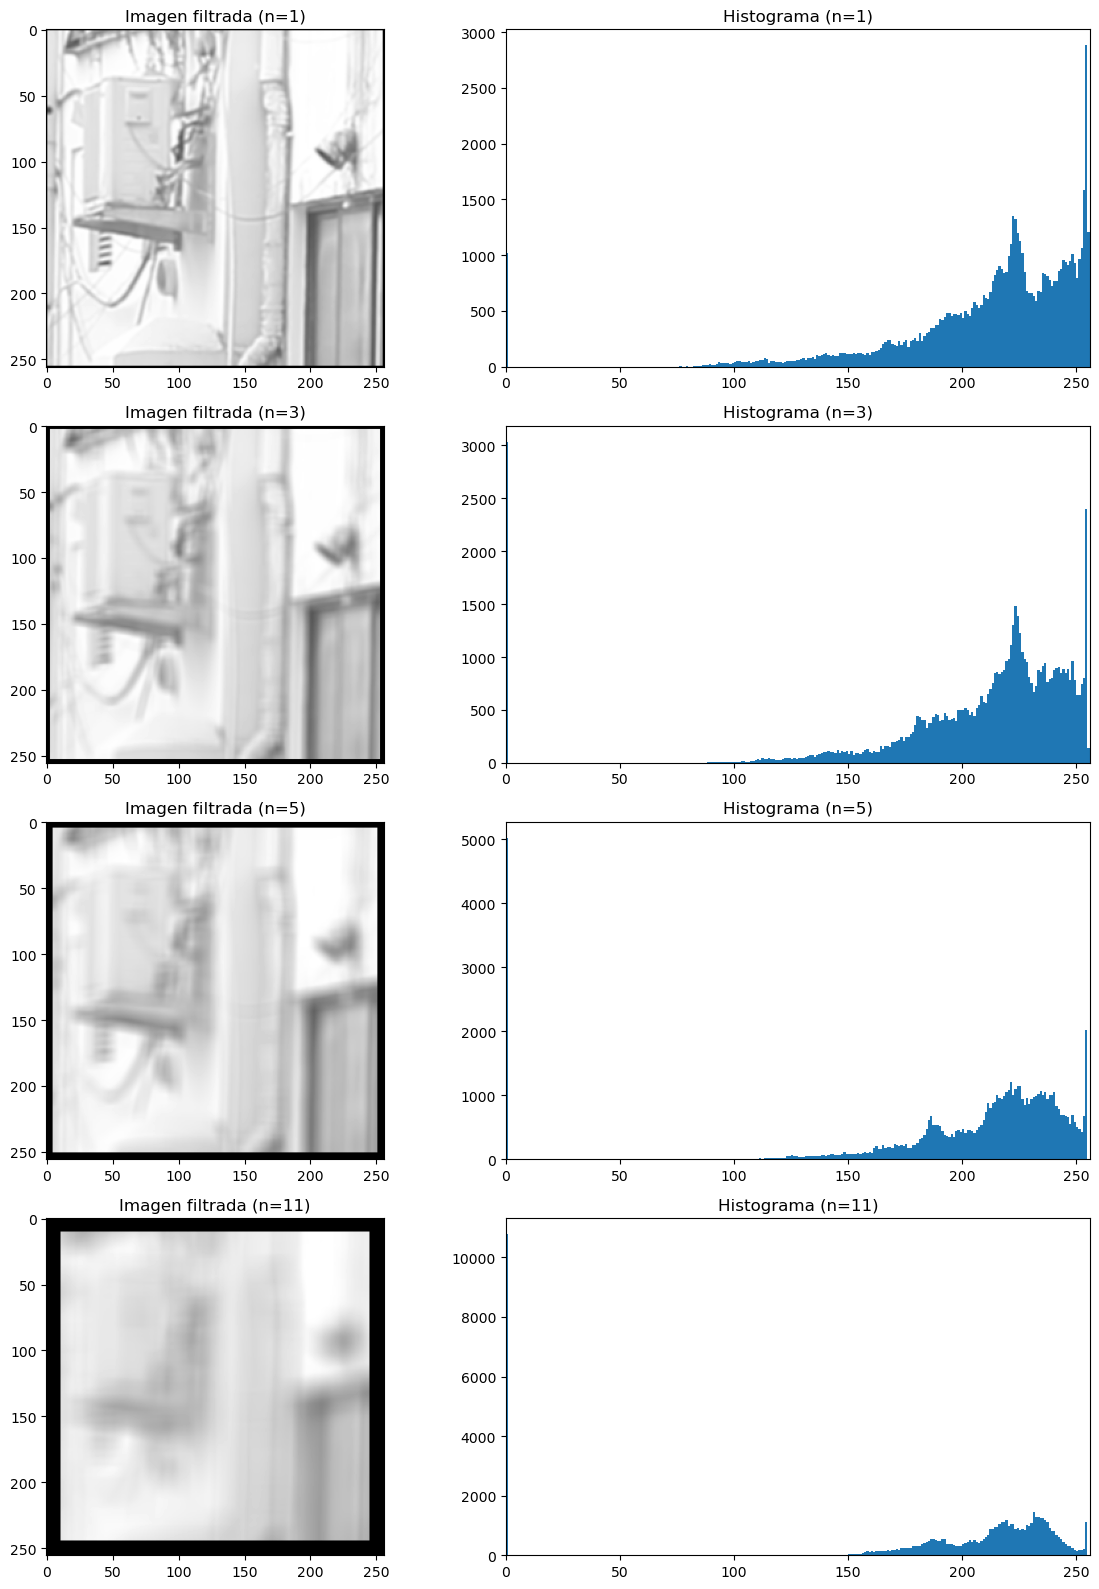

In [72]:
#Histogramas
fig, axs = plt.subplots(len(n_values), 2, figsize=(12, 4*len(n_values)))

for i, n in enumerate(n_values):
    # Aplicar el filtro de promedio
    filtered_img = avg_filter(img, n)

    # Dibujar la imagen filtrada
    axs[i, 0].imshow(filtered_img, cmap='gray')
    axs[i, 0].set_title(f"Imagen filtrada (n={n})")
    
    # Dibujar el histograma
    axs[i, 1].hist(filtered_img.ravel(), bins=256, range=(0,256))
    axs[i, 1].set_title(f"Histograma (n={n})")
    axs[i, 1].set_xlim([0,256])

plt.tight_layout()
plt.show()


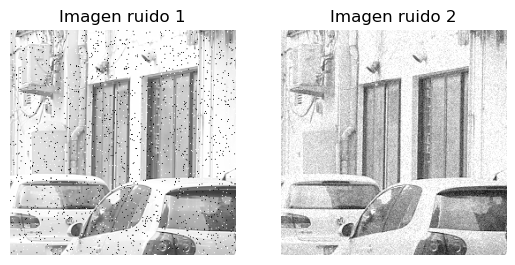

In [73]:
##Leer imágenes con ruido

img_ruido1=cv.imread("G:/Mi unidad/infotec/mcdi/4to semestre/imagenes/DPP0357_sp.png",cv.IMREAD_GRAYSCALE)
img_ruido1 = img_ruido1[0:256, 0:256]

img_ruido2=cv.imread("G:/Mi unidad/infotec/mcdi/4to semestre/imagenes/DPP0357_gs.png",cv.IMREAD_GRAYSCALE)
img_ruido2 = img_ruido2[0:256, 0:256]
images = [img_ruido1, img_ruido2]
#mostrar las imagenes
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.title("Imagen ruido " + str(i+1))
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

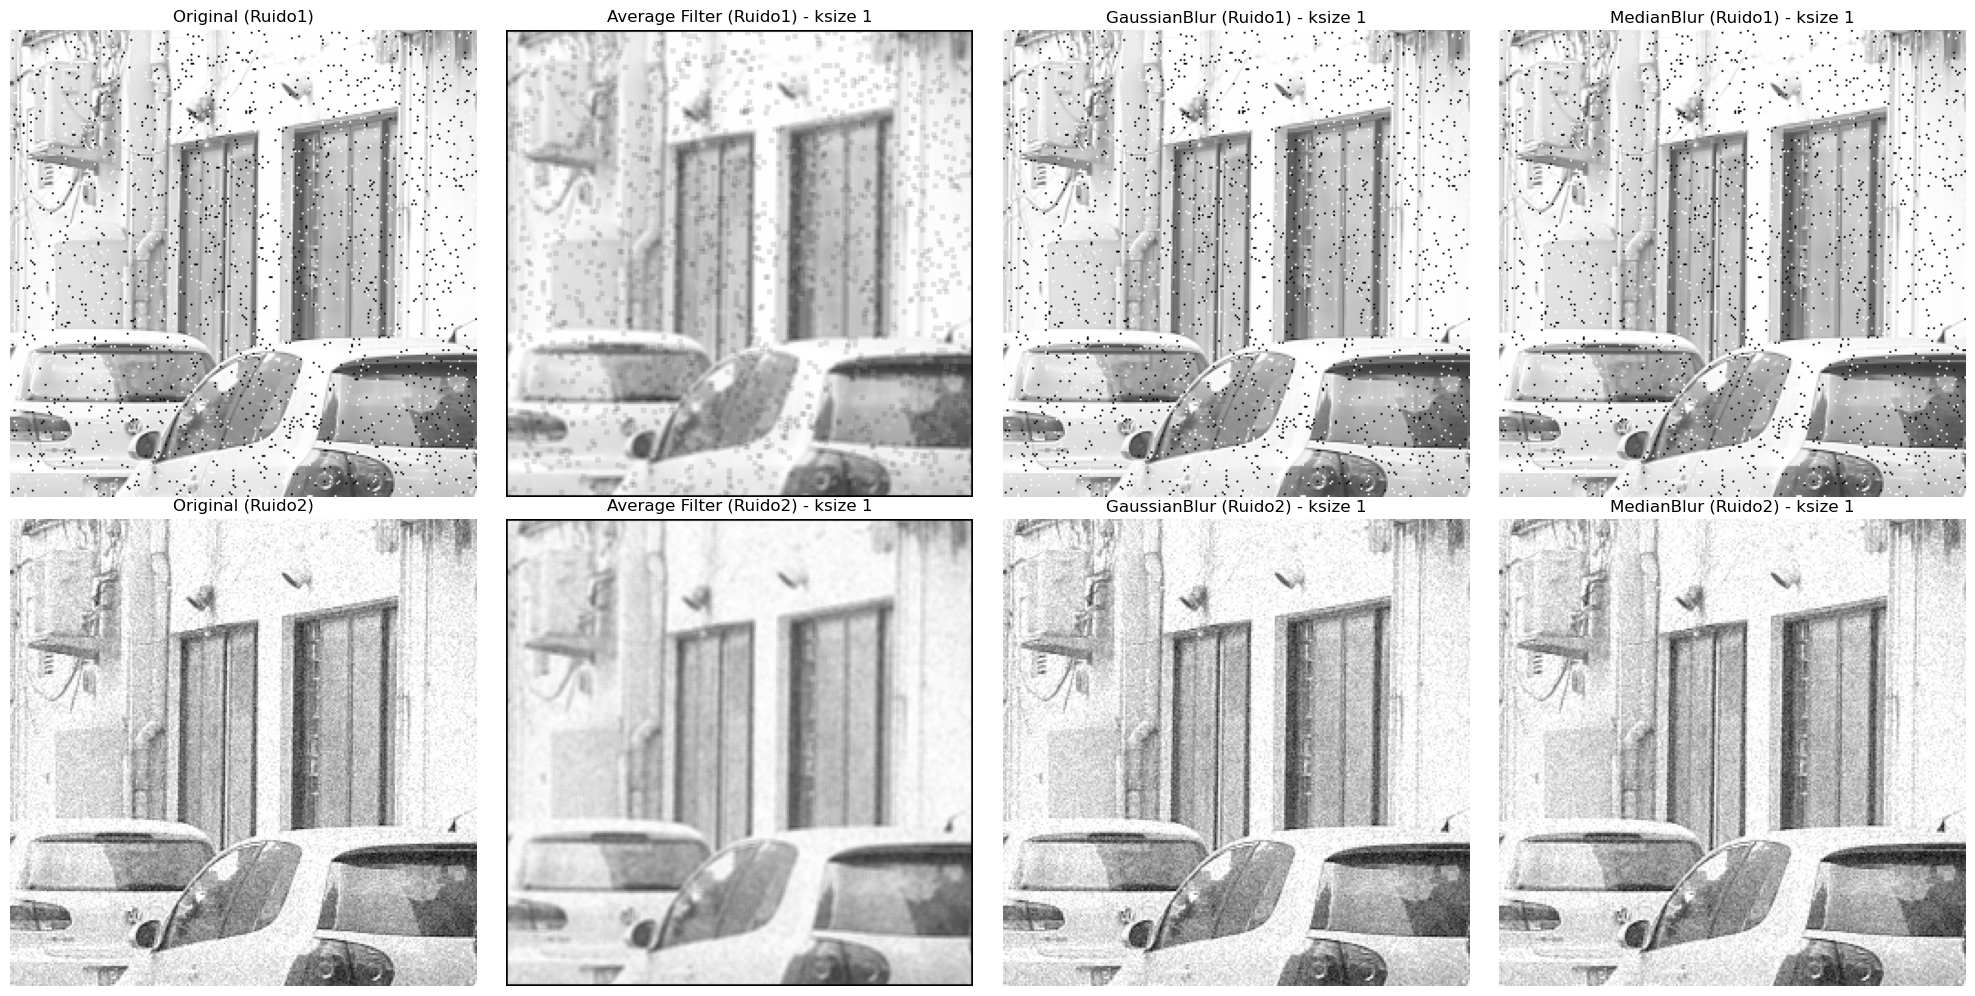

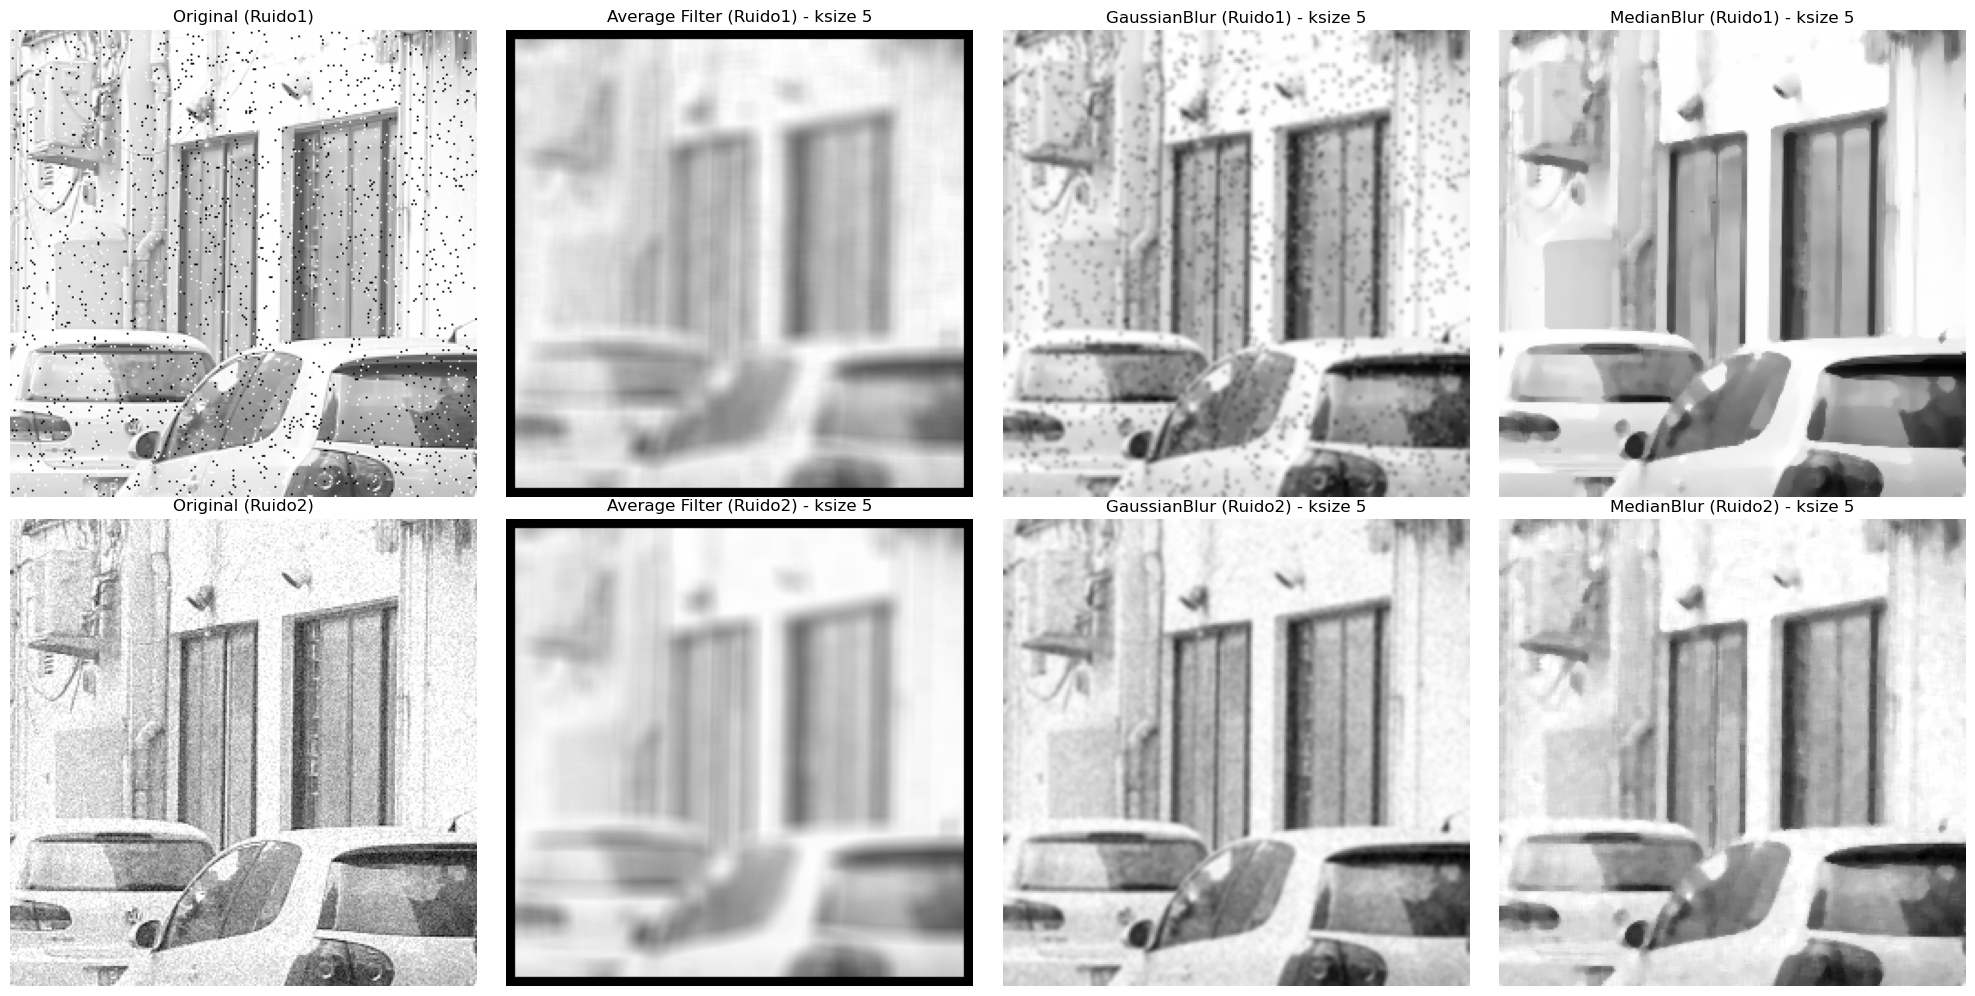

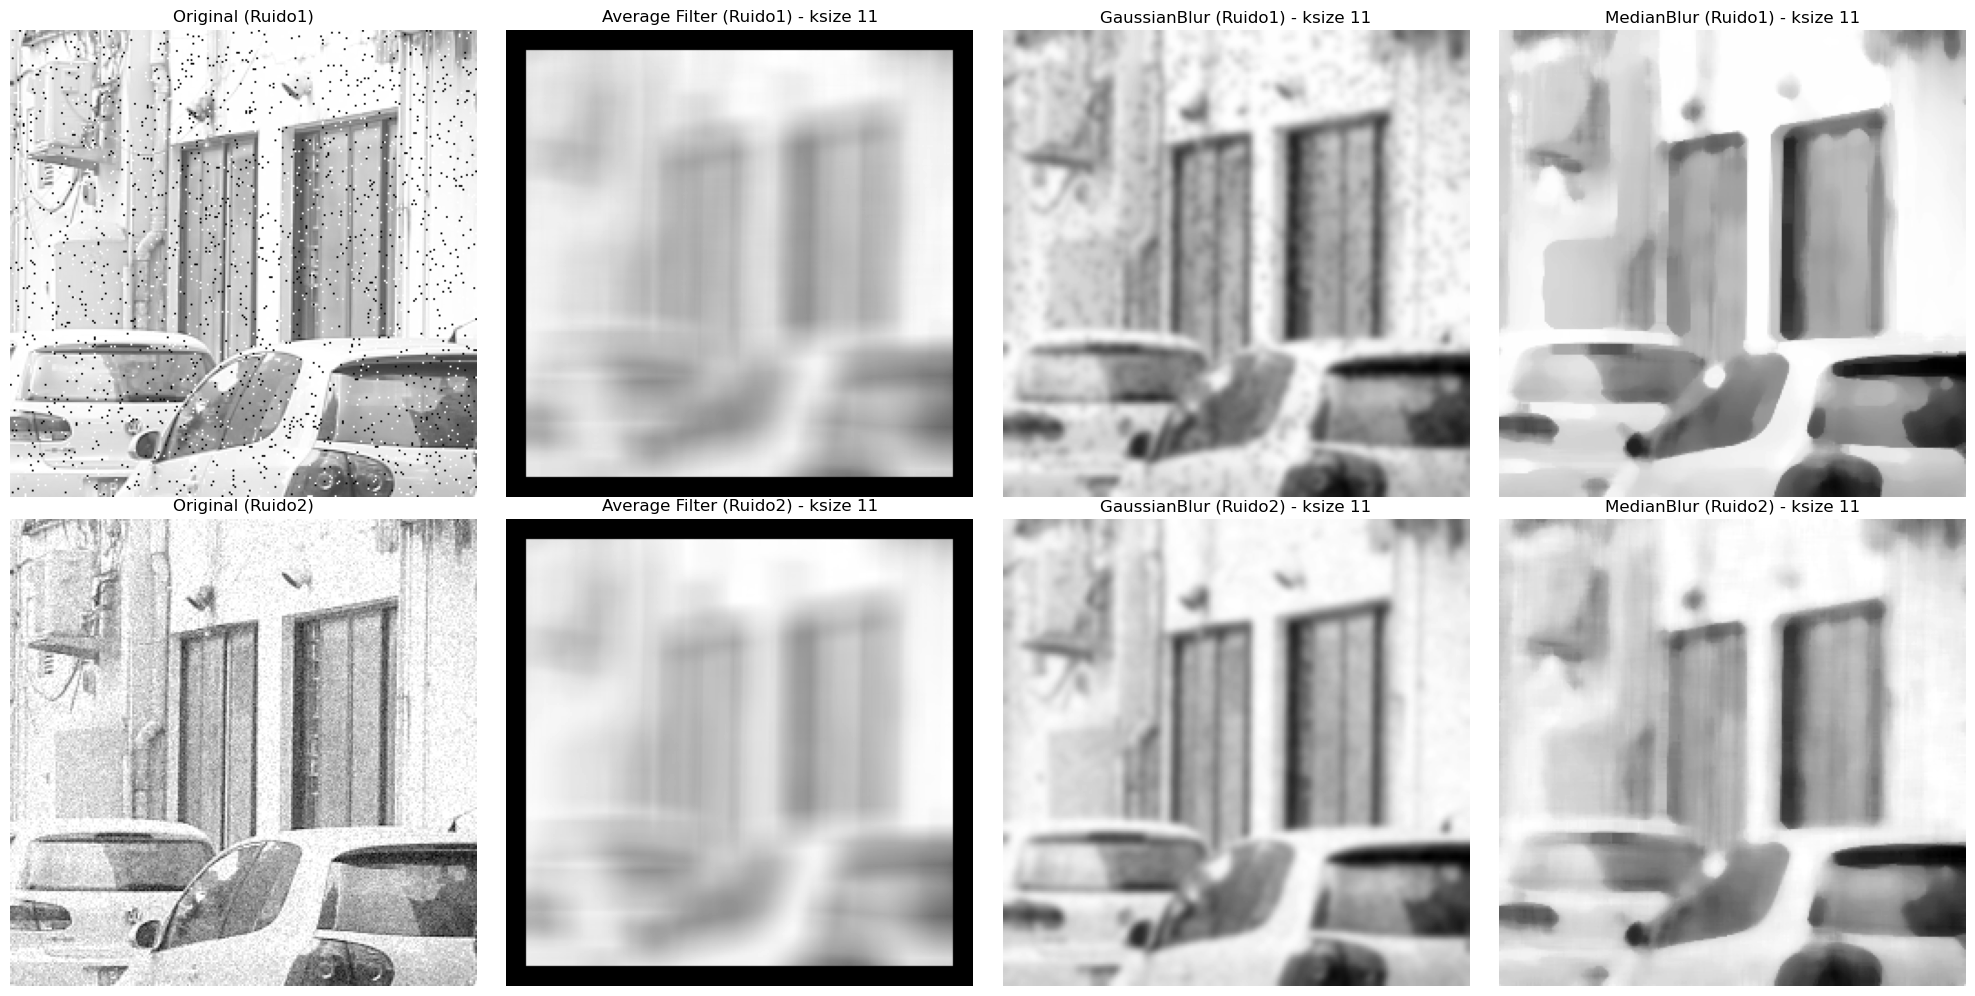

In [74]:
titles = ["Ruido1", "Ruido2"]
ksizes = [1, 5, 11]  

for ksize in ksizes:
    fig, axs = plt.subplots(2, 4, figsize=(20, 10))
    
    for i, (imagen, title) in enumerate(zip(images, titles)):
        # Aplicar filtros
        img_avg = avg_filter(imagen, ksize)  
        img_gaussian = cv.GaussianBlur(imagen, (ksize, ksize), 0)
        img_median = cv.medianBlur(imagen, ksize)

        # Mostrar imágenes originales y filtradas
        axs[i, 0].imshow(imagen, cmap='gray')
        axs[i, 0].set_title(f'Original ({title})')
        
        axs[i, 1].imshow(img_avg, cmap='gray')
        axs[i, 1].set_title(f'Average Filter ({title}) - ksize {ksize}')
        
        axs[i, 2].imshow(img_gaussian, cmap='gray')
        axs[i, 2].set_title(f'GaussianBlur ({title}) - ksize {ksize}')
        
        axs[i, 3].imshow(img_median, cmap='gray')
        axs[i, 3].set_title(f'MedianBlur ({title}) - ksize {ksize}')
    
    for ax_row in axs:
        for ax in ax_row:
            ax.axis('off')
            for spine in ax.spines.values():  
                spine.set_visible(False)

    plt.tight_layout()
    plt.show()

